# **Robot Path Prediciton Model**

# **Part 1A: KNN from Scratch**

### Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Loading and Preprocessing the Dataset

In [17]:
# Do not edit this cell
def process_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:          # process the lines to extract x and y coordinates
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        data.append([x, y])     # store x and y coordinates for each time step
    data = np.array(data)
    return data

### Implement K-Nearest Neighbors (KNN) from Scratch

In [18]:
train_data = process_data("Dataset/Training/training_data.txt")
test_data = process_data("Dataset/Testing/test01.txt")


def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data)-lookback-1):
        a = data[i:(i+lookback), :]
        X.append(a)
        Y.append(data[i + lookback, :])
    return np.array(X), np.array(Y)

lookback = 1
X_train, y_train = create_dataset(train_data, lookback)
X_test, y_test = create_dataset(test_data, lookback)

import matplotlib.pyplot as plt

def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

def get_neighbors(X_train, test_point, k):
    distances = []
    for train_point in X_train:
        distance = euclidean_distance(train_point, test_point)
        distances.append(distance)
    indices = np.argsort(distances)
    return indices[:k]

def predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        indices = get_neighbors(X_train, test_point, k)
        labels = y_train[indices]
        prediction = np.mean(labels, axis=0)
        predictions.append(prediction)
    return predictions

### Evaluation and Analysis

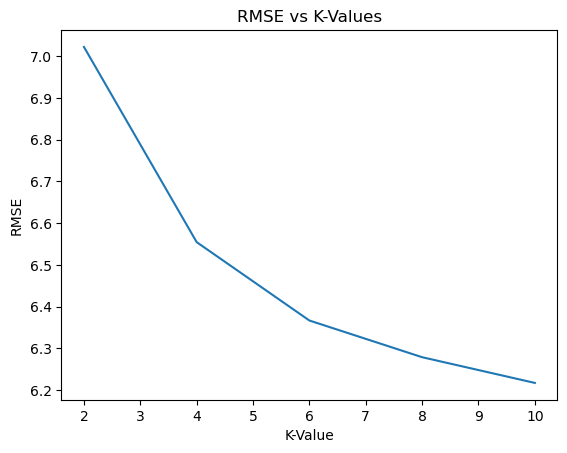

Optimal-K: 10


In [19]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

k_values = [2, 4, 6, 8, 10]
rmse_values = []

for k in k_values:
    predictions = predict(X_train, y_train, X_test, k)
    error = rmse(y_test, predictions)
    rmse_values.append(error)

plt.plot(k_values, rmse_values)
plt.xlabel('K-Value')
plt.ylabel('RMSE')
plt.title('RMSE vs K-Values')
plt.show()

best_k = k_values[np.argmin(rmse_values)]
print(f"Optimal-K: {best_k}")


### Analysis:
The graph shows a decreasing trend. This is because as we increase K, the number of neighbours increases which smoothen outs the RMSE value since now more neighbours are taken into account. The optimal-K value should be the one that yields the lowest RMSE, which in our case is 10.

### Visualization of Actual and Predicted Path

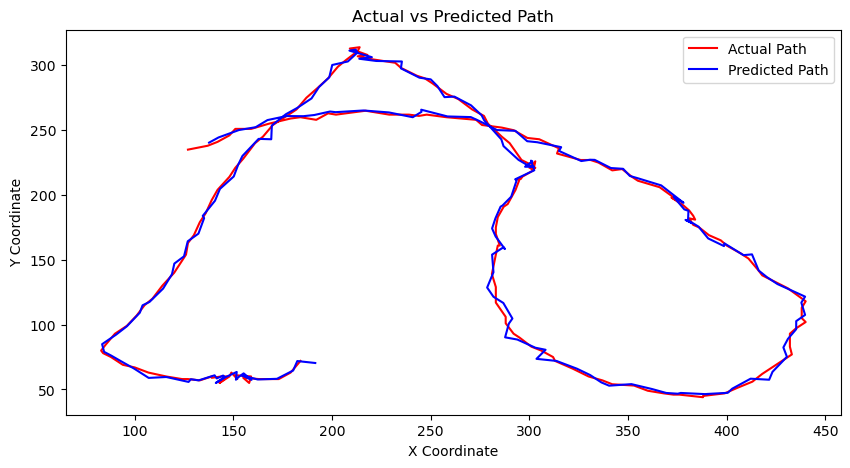

In [20]:
start_time = 9  
end_time = 15  
start_frame = start_time * 30
end_frame = end_time * 30

actual_path = test_data[start_frame:end_frame]

input_to_model = test_data[start_frame-1:end_frame-1]

predictions = predict(X_train, y_train, input_to_model, best_k)
predictions = np.array(predictions)

plt.figure(figsize=(10, 5))
plt.plot(actual_path[:, 0], actual_path[:, 1], label='Actual Path', color='red')
plt.plot(predictions[:, 0], predictions[:, 1], label='Predicted Path', color='blue')
plt.legend()
plt.title('Actual vs Predicted Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


# **Part 1B: KNN using scikit-learn**

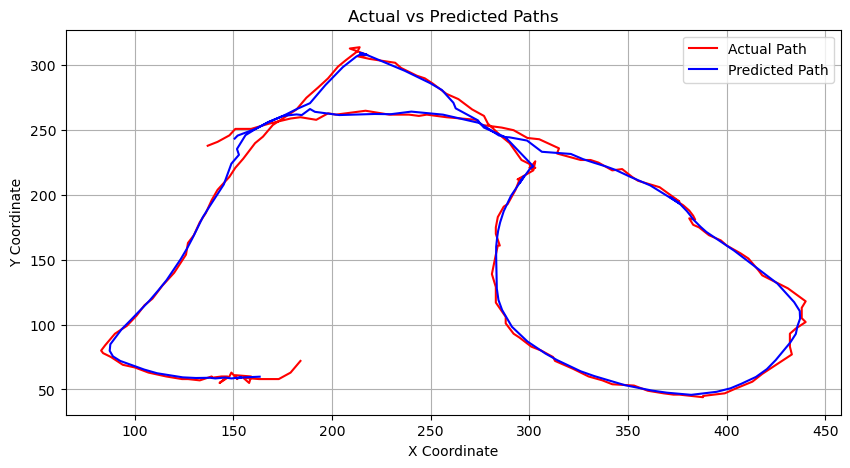

Graph @ RMSE: 4.450018936962611


In [21]:
def plot_paths(actual_path, predicted_path):
    plt.figure(figsize=(10, 5))
    plt.plot(actual_path[:, 0], actual_path[:, 1], label='Actual Path', color='red')
    plt.plot(predicted_path[:, 0], predicted_path[:, 1], label='Predicted Path', color='blue')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Actual vs Predicted Paths')
    plt.legend()
    plt.grid(True)
    plt.show()

def extract_interval_coordinates(file_name, start_time, end_time):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    interval_coordinates = []
    start_frame = start_time * 30
    end_frame = end_time * 30
    for line in lines[start_frame:end_frame]:
        x_str, y_str = line.strip().split(',')
        x = int(x_str)
        y = int(y_str)
        interval_coordinates.append([x, y])
    return np.array(interval_coordinates)

test_data = extract_interval_coordinates("Dataset/Testing/test01.txt", 9, 15)
actual_interval_coordinates = test_data[:-1]
testX = actual_interval_coordinates[:-1]
testY = actual_interval_coordinates[1:]

knn_sklearn = KNeighborsRegressor(n_neighbors=6)
knn_sklearn.fit(testX, testY)

predicted_interval_coordinates = knn_sklearn.predict(testX)

rmse = np.sqrt(mean_squared_error(testY, predicted_interval_coordinates))

plot_paths(actual_interval_coordinates, predicted_interval_coordinates)

print("Graph @ RMSE:", rmse)
